# Week3授業課題 信用情報の分析

## 1.このテキストについて
<u>テキストの目的</u>  
・実データに近いものの分析を行う  
・データセットに対して自ら課題を設定できるようにする  

<u>どのように学ぶか</u>  
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 2.信用情報
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。


[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)


Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

<img src="https://t.gyazo.com/teams/diveintocode/9ae56271f6c8be31f3f779c449661a90.png">

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


１. Home Creditはどのような企業？  
２. このコンペティションでは何を予測する？  
３. それを予測することで企業が得られるメリットは何？  

<u>データセットの準備</u>  
データセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。


Dataページ内の他のcsvファイルはこの課題では扱いません。


<u>Notebooksについて</u>  
コンペティションのNotebooksページで公開されているものを活用してください。


**《推奨参考Notebooks》**


[Home Credit Default Risk Extensive EDA | Kaggle](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)


[HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle](https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772)


[HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle](https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp)


この他タイトルにEDAと付いているものを参考にしてください。



### Home Creditはどのような企業？
クレジットの返済能力の予測会社

### このコンペティションでは何を予測する？
各特徴量によってクライアントに貸付可能かを予測する

### それを予測することで企業が得られるメリットは何？
貸し倒れのリスクを回避することが可能となる。

## 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。


・.head()、.info()、describe()などを使う  
・欠損値の有無を見る  
・クラスの割合がわかるグラフを描く  

それぞれ結果に対する説明や考察も行ってください。

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns', 122)
df = pd.read_csv('./application_train.csv')

# head()を使う。
df.head(5)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# info()を使う。
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
# describe()を使う。
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

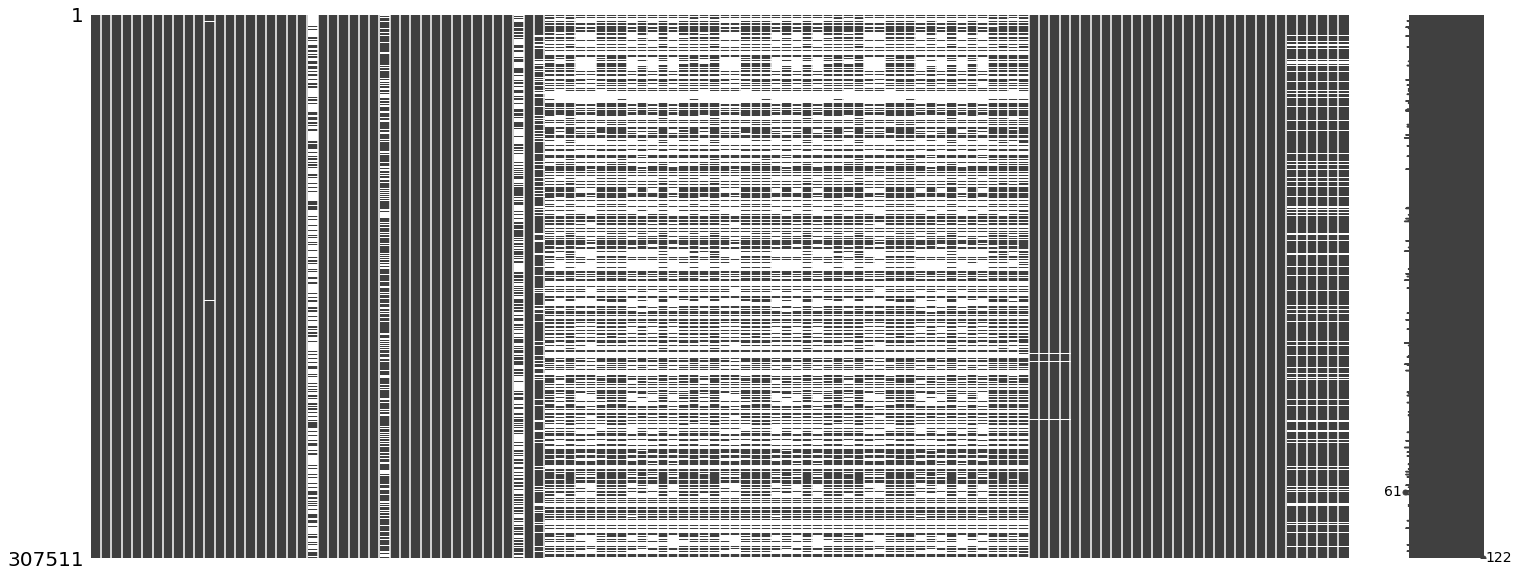

In [7]:
# 欠損値の有無を見る。
import missingno as msno

# 欠損値をMatrix表示
msno.matrix(df)

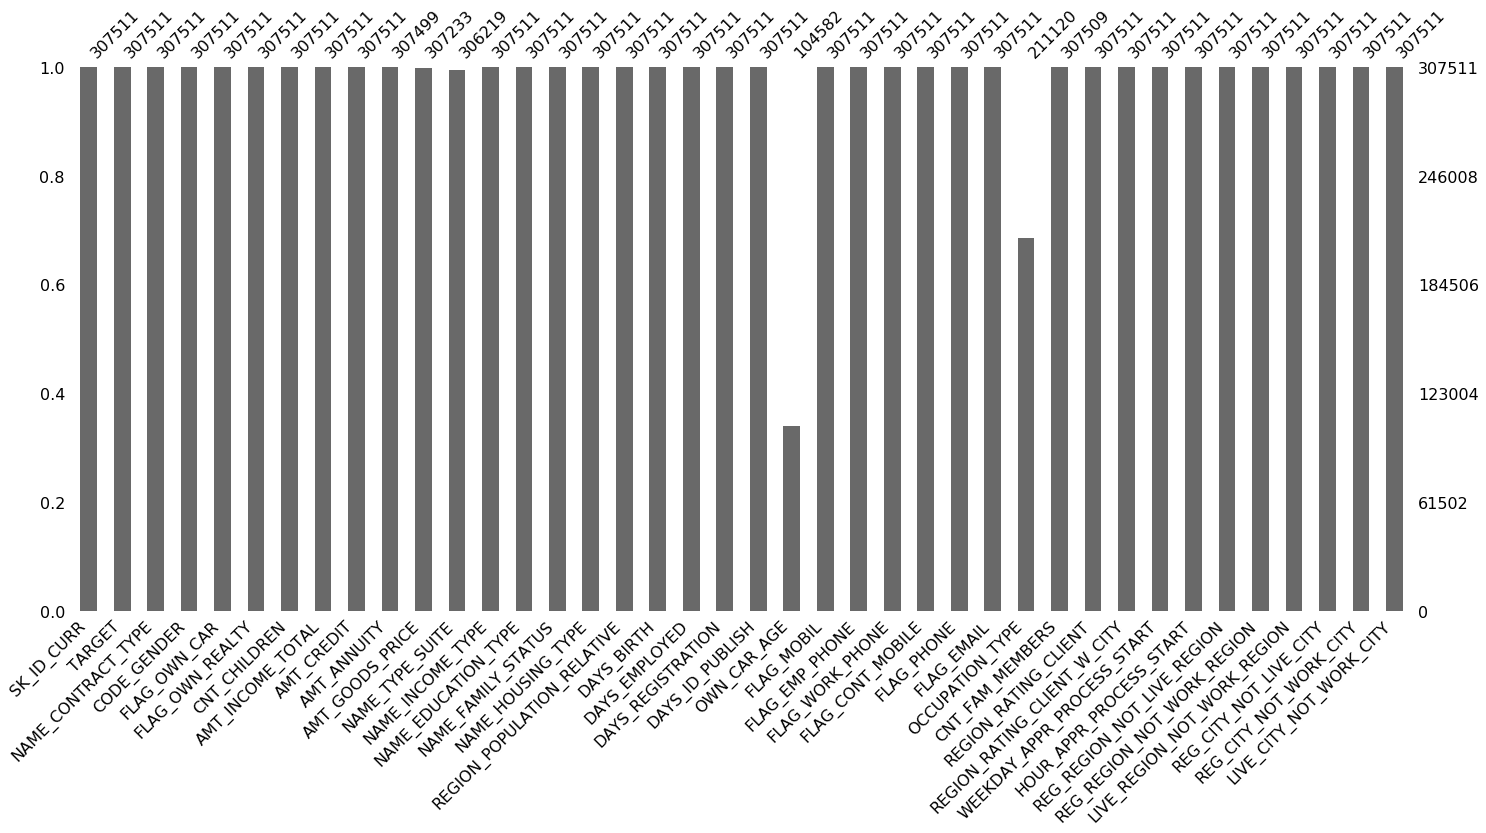

In [8]:
# ０～４０項目まで棒グラフ化
msno.bar(df.iloc[:,0:40:])

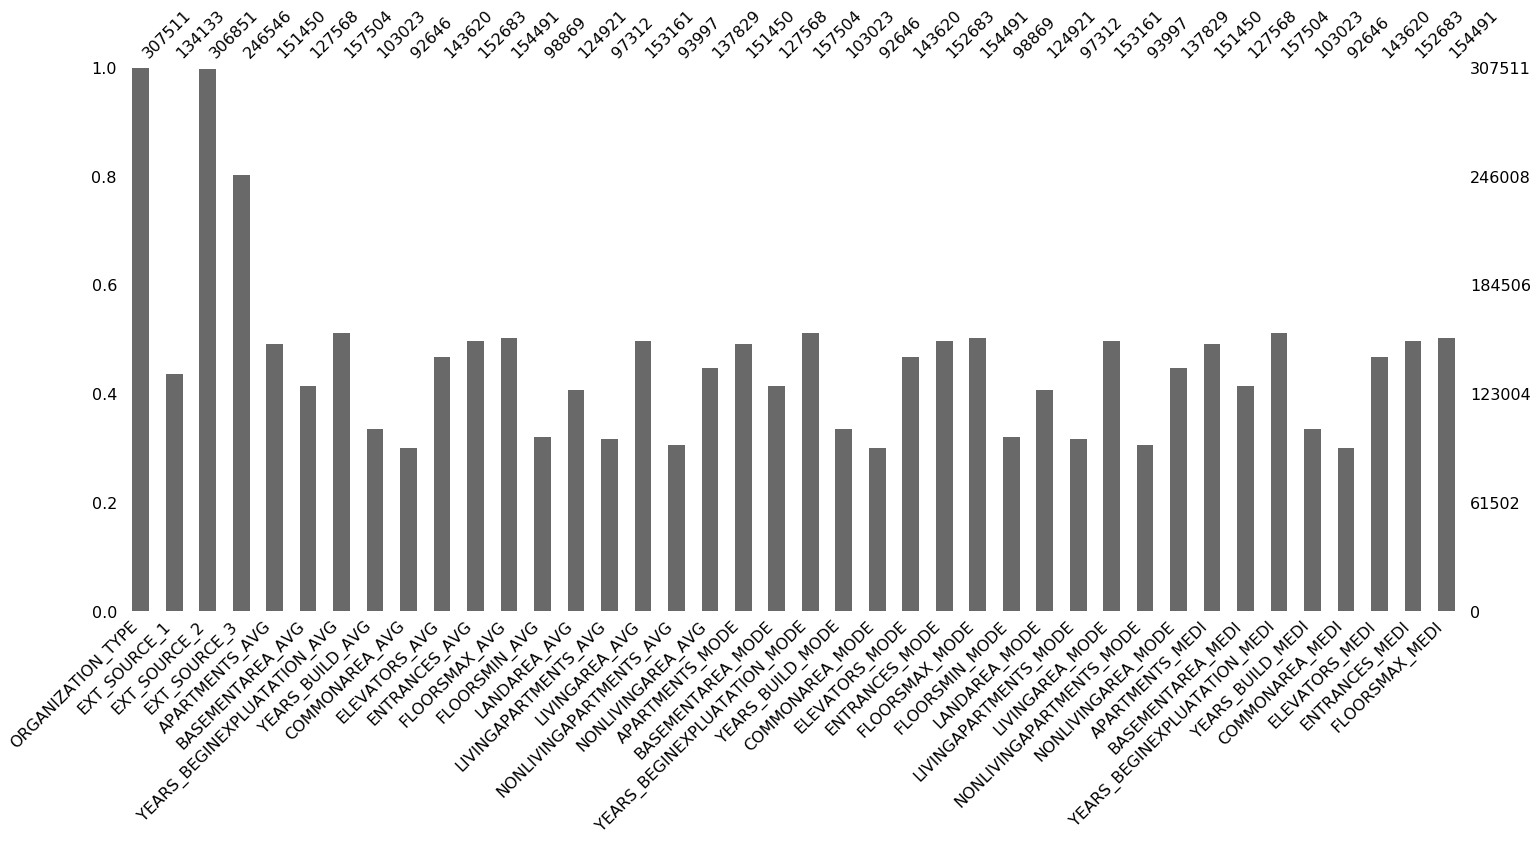

In [9]:
# ４０～８０項目まで棒グラフ化
msno.bar(df.iloc[:,40:80:])

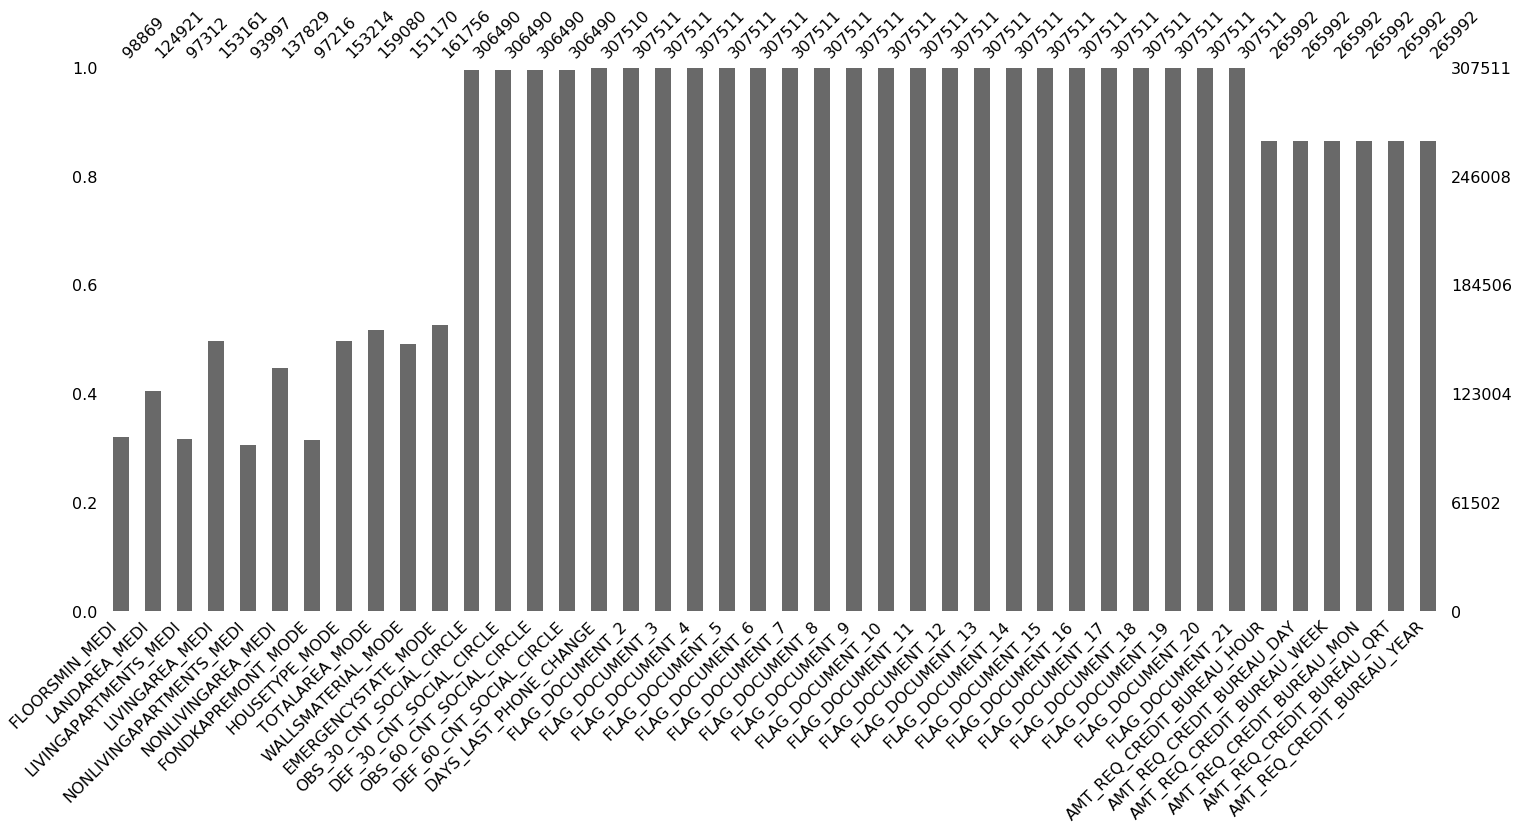

In [10]:
# ８０～最後の項目まで棒グラフ化
msno.bar(df.iloc[:,80::])

In [11]:
drop_df = df
# 半分以上欠損値を含む列を削除する。
drop_df = drop_df.dropna(thresh=df.shape[0]*0.5, axis=1)
drop_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,

In [12]:
drop_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [13]:
# 欠損値があるサンプル（行）は削除する。
# カラムElectricalに欠損値を含む１データが削除される。
drop_df = drop_df.dropna(axis=0) 
drop_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
12,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,67500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-13439,-2717,-311.0,-3227,1,1,1,1,1,0,Laborers,2.0,2,2,FRIDAY,10,0,0,0,0,0,0,Business Entity Type 2,0.715042,0.176653,0.9811,0.1667,0.9811,0.1667,0.9811,0.1667,0.0612,No,0.0,0.0,0.0,0.0,-2370.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
13,100017,0,Cash loans,M,Y,N,1,225000.0,918468.0,28966.5,697500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.016612,-14086,-3028,-643.0,-4911,1,1,0,1,0,0,Drivers,3.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,0.566907,0.770087,0.9806,0.3333,0.9806,0.3333,0.9806,0.3333,0.1417,No,0.0,0.0,0.0,0.0,-4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
18,100022,0,Revolving loans,F,N,Y,0,112500.0,157500.0,7875.0,157500.0,Other_A,Working,Secondary / secondary special,Widow,House / apartment,0.046220,-17718,-7804,-8751.0,-1259,1,1,0,1,1,0,Laborers,1.0,1,1,FRIDAY,13,0,0,0,0,0,0,Housing,0.706428,0.556727,0.9881,0.0833,0.9881,0.0833,0.9881,0.0833,0.0238,No,8.0,0.0,8.0,0.0,-239.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.020713,-11146,-4306,-114.0,-2518,1,1,0,1,0,0,Sales staff,3.0,3,2,THURSDAY,6,0,0,0,0,0,0,Self-employed,0.457143,0.358951,0.9786,0.1667,0.9786,0.1667,0.9786,0.1667,0.0696,No,0.0,0.0,0.0,0.0,-468.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,456239,0,Cash loans,M,Y,N,0,180000.0,808650.0,23773.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartme

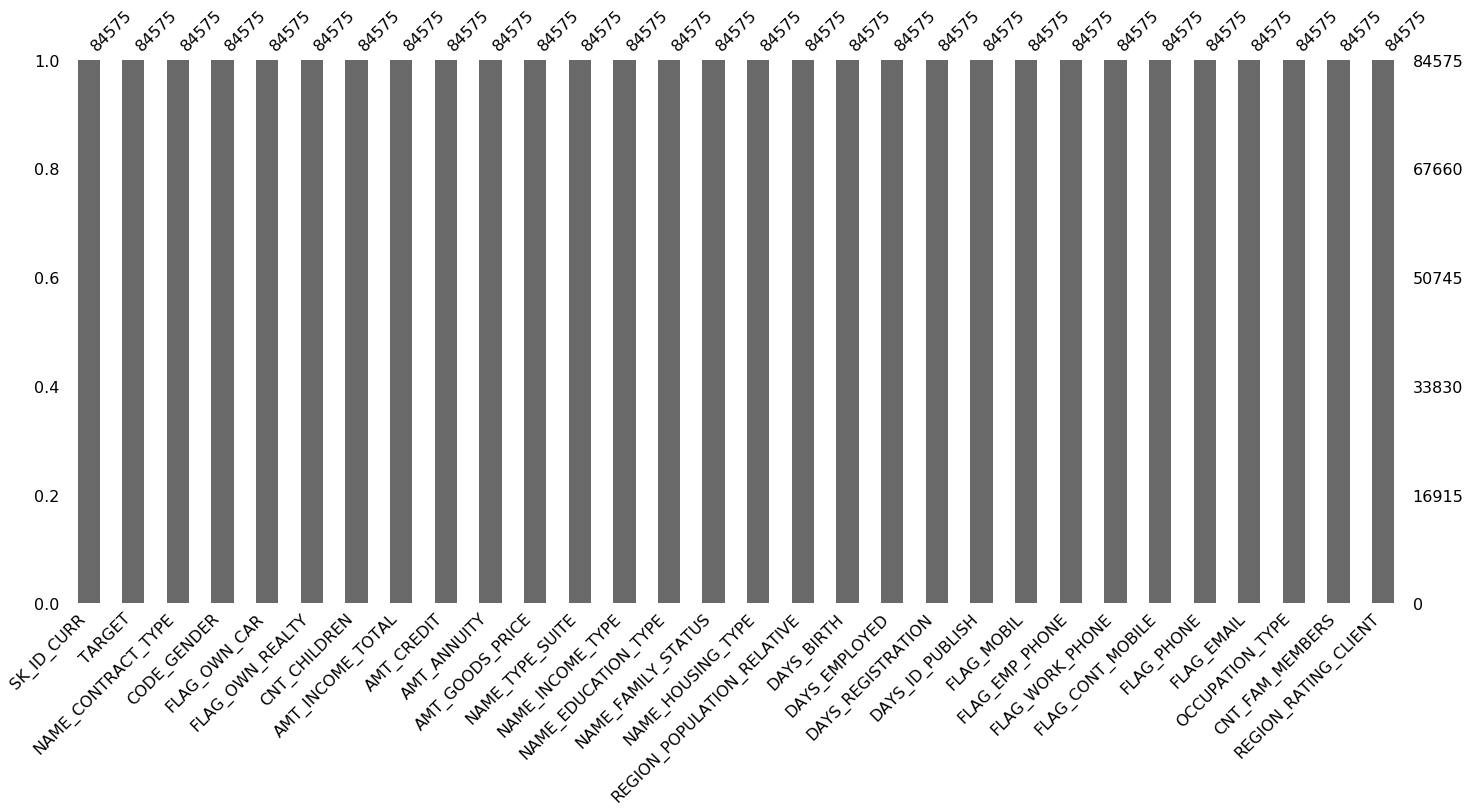

In [14]:
# 欠損値の削除確認　３０列まで
msno.bar(drop_df.iloc[:,0:30])

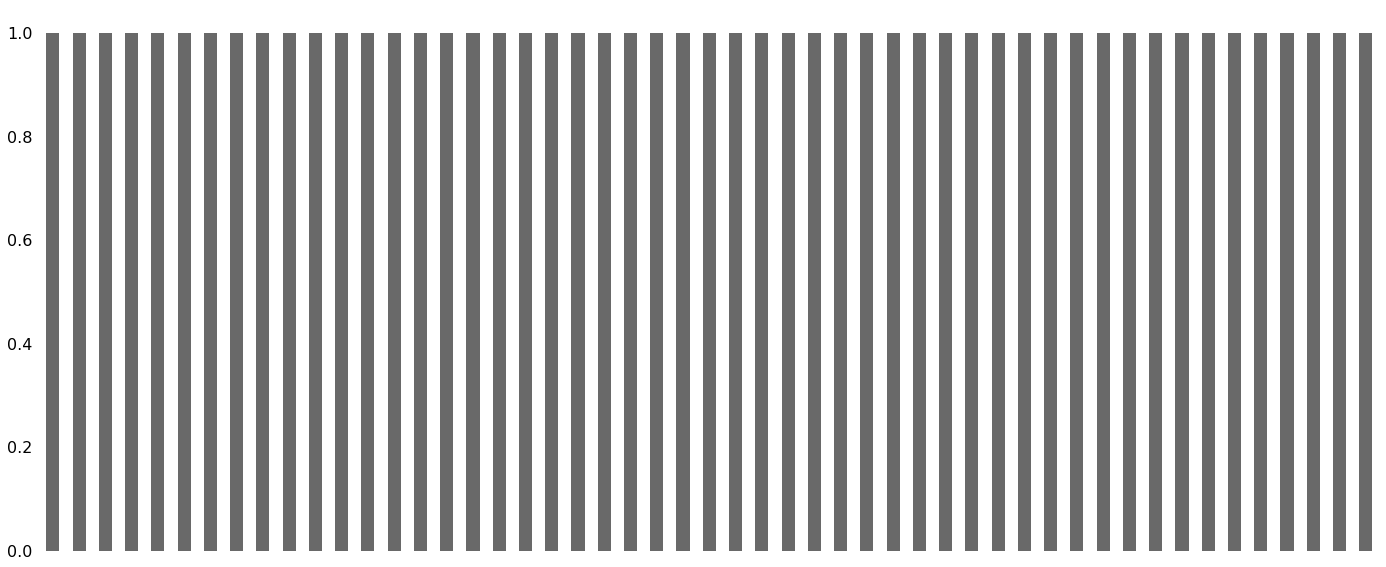

In [15]:
# 欠損値の削除確認　３０以降
msno.bar(drop_df.iloc[:,30:])

In [16]:
# .value_countsを使用
vc = drop_df['TARGET'].value_counts(sort=False)
vc

0    78299
1     6276
Name: TARGET, dtype: int64

([<matplotlib.patches.Wedge at 0x22e8234c548>,
 [Text(0.2759976804765098, -1.0648123216659293, 'other'),
  Text(-0.2759977054002407, 1.0648123152057372, 'payment difficulties')],
 [Text(0.1505441893508235, -0.5808067209086887, '91.9%'),
  Text(-0.15054420294558582, 0.5808067173849475, '8.1%')])

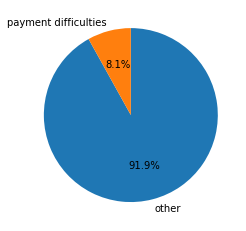

In [17]:
# クラスごとのデータ数をグラフに出す
labels = ["other", "payment difficulties"]
plt.pie(df['TARGET'].value_counts(sort=False), labels= labels, autopct = '%1.1f%%', startangle = 90, counterclock=False) 

In [18]:
df_vc = df['CODE_GENDER'].value_counts(sort=False)
df_vc

XNA         4
M      105059
F      202448
Name: CODE_GENDER, dtype: int64

In [19]:
type(df_vc)

pandas.core.series.Series

## 【問題3】課題設定  
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

①性別によって返済有無に差があるのか？    
②年齢によって返済有無に差があるのか？  
③登録日(契約日)によって返済有無に差があるのか？  
④子供の有無によって返済有無に差があるのか？

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを **15個以上** 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [52]:
# ワンホットエンコーディング
df_one_hot_encoded = pd.get_dummies(drop_df)
new_df = df_one_hot_encoded

### ＜相関関係の算出＞

In [54]:
# 相関係数の算出
df_corr = new_df.corr()
new_df.shape

(84575, 189)

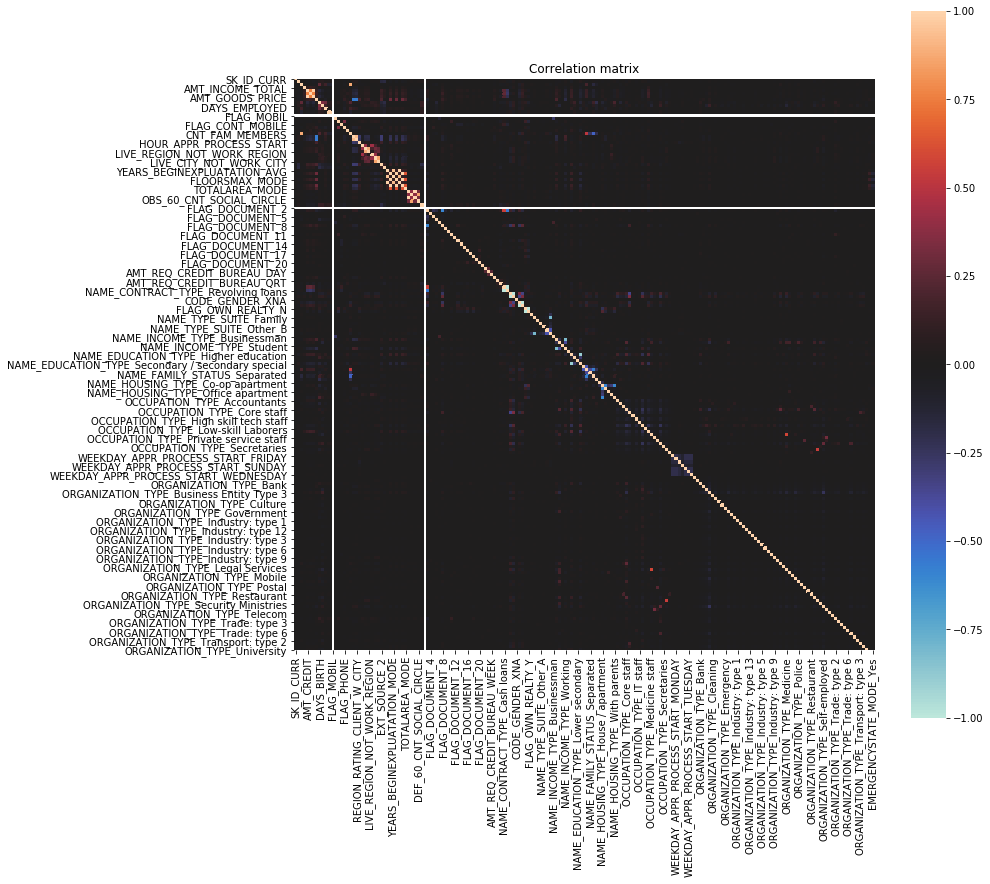

In [55]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(13, 13)) 

# ヒートマップの作成
plt.title('Correlation matrix')
sns.heatmap(df_corr, vmax=1, center = 0, annot=False, square=True)

全体的な相関関係は弱い

In [62]:
# TARGETとの相関係数上位１０項目を抽出
df_corr["TARGET"].sort_values(ascending=False)

TARGET                                               1.000000
DAYS_EMPLOYED                                        0.067902
DAYS_BIRTH                                           0.061618
NAME_EDUCATION_TYPE_Secondary / secondary special    0.054697
REGION_RATING_CLIENT_W_CITY                          0.050473
REGION_RATING_CLIENT                                 0.048078
DAYS_LAST_PHONE_CHANGE                               0.045702
CODE_GENDER_M                                        0.042584
FLAG_DOCUMENT_3                                      0.037928
NAME_INCOME_TYPE_Working                             0.037536
DAYS_ID_PUBLISH                                      0.037516
NAME_CONTRACT_TYPE_Cash loans                        0.035522
OCCUPATION_TYPE_Laborers                             0.035415
DEF_30_CNT_SOCIAL_CIRCLE                             0.028788
DEF_60_CNT_SOCIAL_CIRCLE                             0.028632
OCCUPATION_TYPE_Low-skill Laborers                   0.027828
OCCUPATI

In [66]:
# TARGETとの相関係数上位１０項目を抽出(相関関係の正負も考慮し、絶対値を取る)
abs(df_corr["TARGET"]).sort_values(ascending=False)[1:11].index

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI'],
      dtype='object')

In [69]:
# 上位１０項目で再度相関係数を出しなおす。
new_df_corr = df_corr[abs(df_corr["TARGET"]).sort_values(ascending=False)[1:11].index]
new_df_corr_corr = new_df_corr.corr()
new_df_corr_corr

,EXT_SOURCE_3,EXT_SOURCE_2,DAYS_EMPLOYED,DAYS_BIRTH,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Secondary / secondary special,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLOORSMAX_AVG,FLOORSMAX_MEDI
EXT_SOURCE_3,1.000000,0.269214,-0.335276,-0.401629,-0.000302,0.045240,-0.031209,-0.029725,0.030624,0.030628
EXT_SOURCE_2,0.269214,1.000000,-0.226735,-0.300698,0.303729,-0.272021,-0.605495,-0.608561,0.370066,0.368443
DAYS_EMPLOYED,-0.335276,-0.226735,1.000000,0.635141,0.016761,-0.072900,-0.024632,-0.028398,-0.014253,-0.014153
DAYS_BIRTH,-0.401629,-0.300698,0.635141,1.000000,0.128893,-0.207873,0.091293,0.089964,-0.052773,-0.052563
NAME_EDUCATION_TYPE_Higher education,-0.000302,0.303729,0.016761,0.128893,1.000000,-0.952596,-0.194567,-0.192599,0.324705,0.324126
NAME_EDUCATION_TYPE_Secondary / secondary special,0.045240,-0.272021,-0.072900,-0.207873,-0.952596,1.000000,0.197220,0.195184,-0.318416,-0.317845
REGION_RATING_CLIENT_W_CITY,-0.031209,-0.605495,-0.024632,0.091293,-0.194567,0.197220,1.000000,0.996883,-0.483424,-0.481109
REGION_RATING_CLIENT,-0.029725,-0.608561,-0.028398,0.089964,-0.192599,0.195184,0.996883,1.000000,-0.464419,-0.462081
FLOORSMAX_AVG,0.030624,0.370066,-0.014253,-0.052773,0.324705,-0.318416,-0.483424,-0.464419,1.000000,0.999989
FLOORSMAX_MEDI,0.030628,0.368443,-0.014153,-0.052563,0.324126,-0.317845,-0.481109,-0.462081,0.999989,1.000000


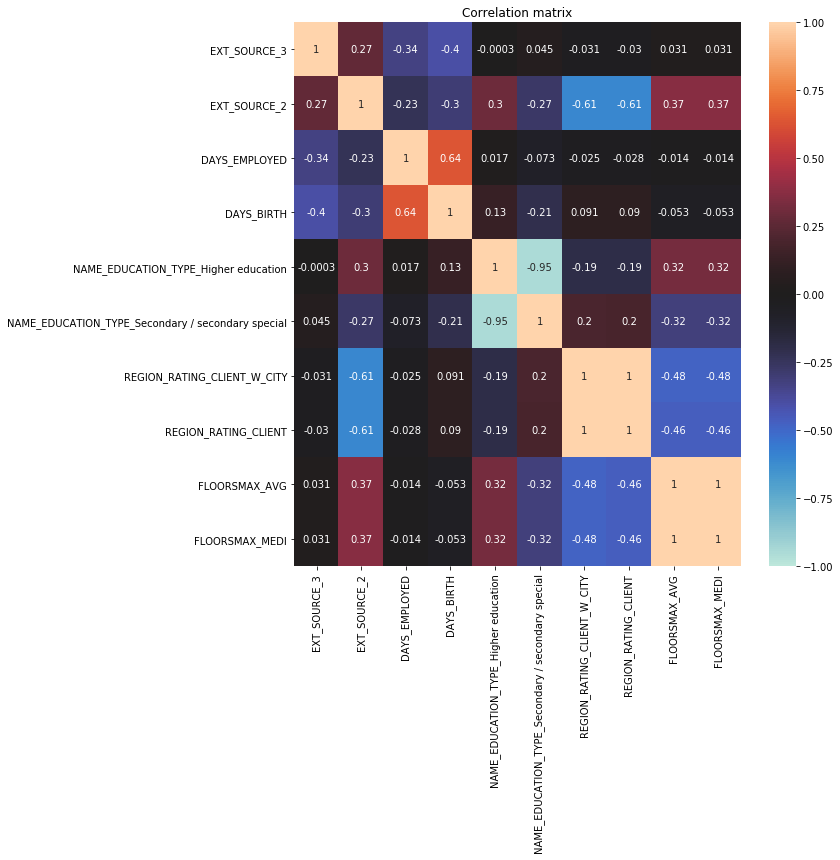

In [76]:
# ヒートマップの作成
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10)) 
plt.title('Correlation matrix')
sns.heatmap(new_df_corr_corr, vmax=1, vmin=-1, center=0, annot=True)
plt.ylim(new_df_corr_corr.shape[0], 0,)
plt.show()

上記のヒートマップから  
①DAYS_EMPLOYEDとDAYS_BIRTHの強い正の相関がある。  
②NAME_EDUCATION_TYPEの“Higher education(高等教育)”と”Secondary / secondary special(中等教育)”に強い負の相関がある。  
③REGION_RATING_CLIENTとREGION_RATING_CLIENT_W_CITYの強い正の相関がある。  
④FLOORSMAX_MEDIとFLOORSMAX_AVGの強い正の相関がある。

### DAYS_EMPLOYEDとDAYS_BIRTHの関係

Text(0, 0.5, 'YEAR_EMPLOYED')

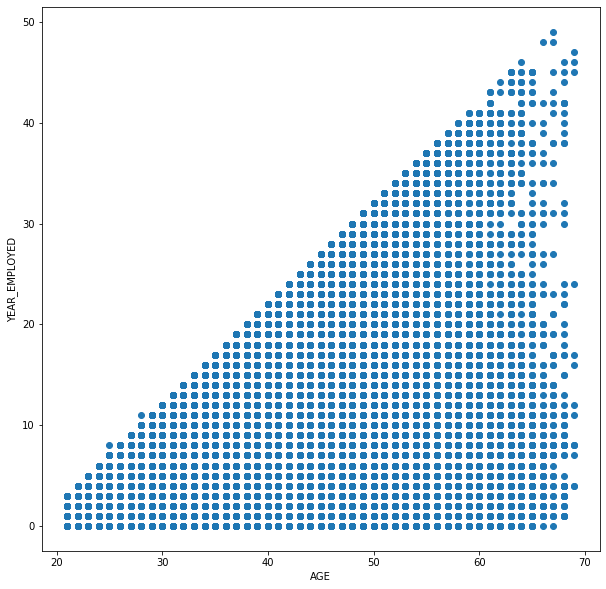

In [84]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter((abs(new_df["DAYS_BIRTH"])/365).round().astype(int), (abs(new_df["DAYS_EMPLOYED"])/365).round().astype(int))
plt.xlabel('AGE')
plt.ylabel('YEAR_EMPLOYED')

年齢と勤続年数の関係になるので、勤続開始年齢がほぼ同一年齢とすると勤続年数は  
（年齢－勤続開始年齢）にはなりえないので上記のグラフのようになる。

### REGION_RATING_CLIENTとREGION_RATING_CLIENT_W_CITYの関係

Text(0, 0.5, 'REGION_RATING_CLIENT_W_CITY')

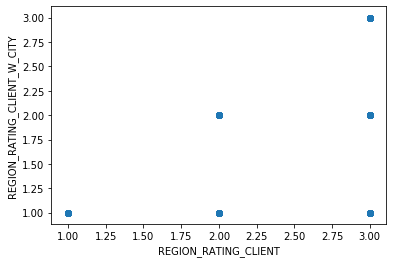

In [90]:
plt.scatter(new_df["REGION_RATING_CLIENT"], new_df["REGION_RATING_CLIENT_W_CITY"])
plt.xlabel('REGION_RATING_CLIENT')
plt.ylabel('REGION_RATING_CLIENT_W_CITY')

REGION_RATING_CLIENT：クライアントが住んでいる地域の評価(1,2,3)  
REGION_RATING_CLIENT_W_CITY：都市を考慮したクライアントの居住地域の評価(1,2,3)  
であるため、上記の散布図からREGION_RATING_CLIENT≧REGION_RATING_CLIENT_W_CITYである事がわかる。  
特徴量名からも相関があるのがわかる。

### その他の項目に関しても調査してみる
### ＜男女比による比較＞－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－

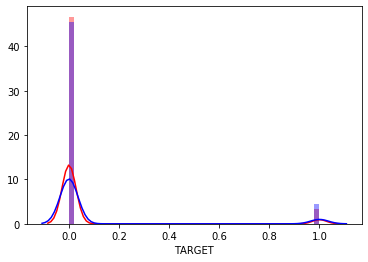

In [51]:
# 女性で支払い能力の有無のヒストグラム化
sns.distplot(new_df["TARGET"][new_df["CODE_GENDER_F"]==1], bins=50, color="r")
# 男性で支払い能力の有無のヒストグラム化
sns.distplot(new_df["TARGET"][new_df["CODE_GENDER_M"]==1], bins=50, color="b")

男女共にほぼ同様の傾向を示すが、  
女性の方が若干、期日内に支払い完了し、遅延するのも少ない。

### ＜年齢による比較＞－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－

In [23]:
# AGE(年齢)カラムの追加
# new_df = df_one_hot_encoded
new_df["AGE"] = (abs(new_df["DAYS_BIRTH"])/365).round().astype(int)

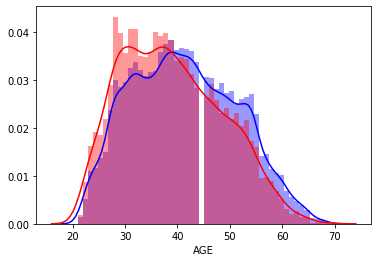

In [24]:
# 返済の有無を年齢毎にヒストグラム化
sns.distplot(new_df["AGE"][new_df["TARGET"]==0], bins=50, color="b")
sns.distplot(new_df["AGE"][new_df["TARGET"]==1], bins=50, color="r")

未返済の中では、２０代～４０代の比率が多い

### ＜登録日による比較＞－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－

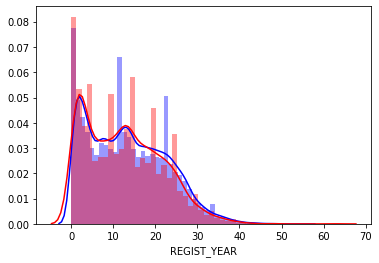

In [25]:
# REGIST_YEAR(登録日)カラムの追加
new_df["REGIST_YEAR"] = (abs(new_df["DAYS_REGISTRATION"])/365).round().astype(int)
new_df

# 登録日でヒストグラムを作成
sns.distplot(new_df["REGIST_YEAR"][new_df["TARGET"]==0], bins=50, color="b")
sns.distplot(new_df["REGIST_YEAR"][new_df["TARGET"]==1], bins=50, color="r")

返済済/未返済共に登録日の分布傾向は似通っており、約２０年間までが大きな割合を占めている。

### ＜子供の数で分析＞－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－－

In [45]:
df_vc = new_df['CNT_CHILDREN'].value_counts(sort=False)
df_vc

0     54449
1     20935
2      8219
3       875
4        76
5         8
6         3
7         4
9         1
10        1
12        2
14        1
19        1
Name: CNT_CHILDREN, dtype: int64

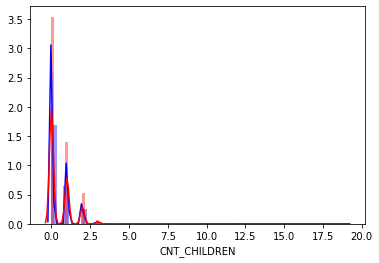

In [27]:
# 登録日でヒストグラムを作成
sns.distplot(new_df["CNT_CHILDREN"][new_df["TARGET"]==0], bins=50, color="b")
sns.distplot(new_df["CNT_CHILDREN"][new_df["TARGET"]==1], bins=50, color="r")

子供の人数によって返済可否に大きな違いはないが、子供の数が１１人より大きい大家族では返済済しか存在しない。

### ＜収支での比較を行うため、特徴量AMT系列で比較してみる。＞－－－－－－－－－－－－－－－－－－－－－

### (AMT_INCOME_TOTAL:クライアントの収入)

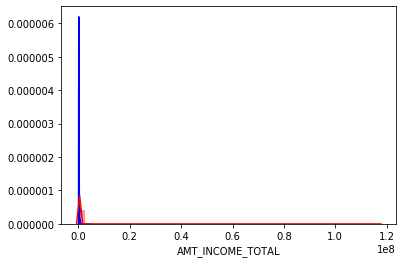

In [28]:
# AMT_INCOME_TOTALでヒストグラムを作成
sns.distplot(new_df["AMT_INCOME_TOTAL"][new_df["TARGET"]==0], bins=50, color="b")
sns.distplot(new_df["AMT_INCOME_TOTAL"][new_df["TARGET"]==1], bins=50, color="r")

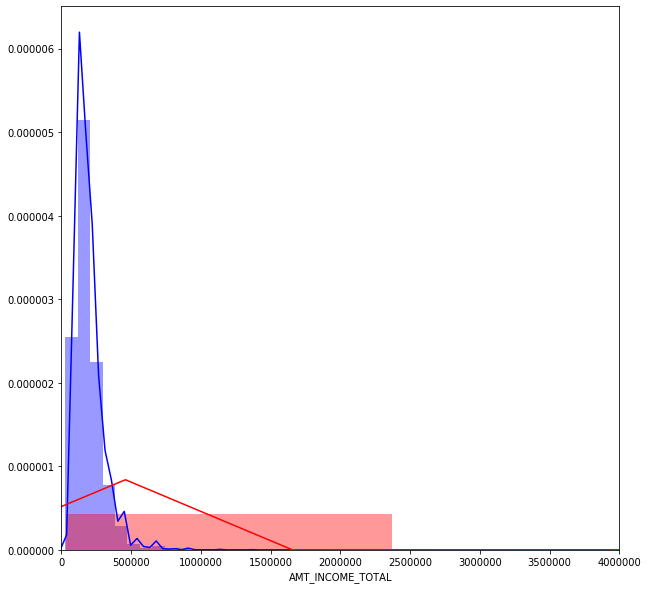

In [29]:
# 400万ドルまでで再描画
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(0,4000000)
sns.distplot(new_df["AMT_INCOME_TOTAL"][new_df["TARGET"]==0], bins=50, color="b")
sns.distplot(new_df["AMT_INCOME_TOTAL"][new_df["TARGET"]==1], bins=50, color="r")
plt.show()

期日内に完済した人のAMT_INCOME_TOTALは、50万ドル以下の者がほとんどを占める。  
期日内に完済出来なかった人のAMT_INCOME_TOTALは250万ドル以下の割合が多くを占めるが、  
最大で1.2億ドルまで広く分布している。

### (AMT_CREDIT:ローンの与信金額)

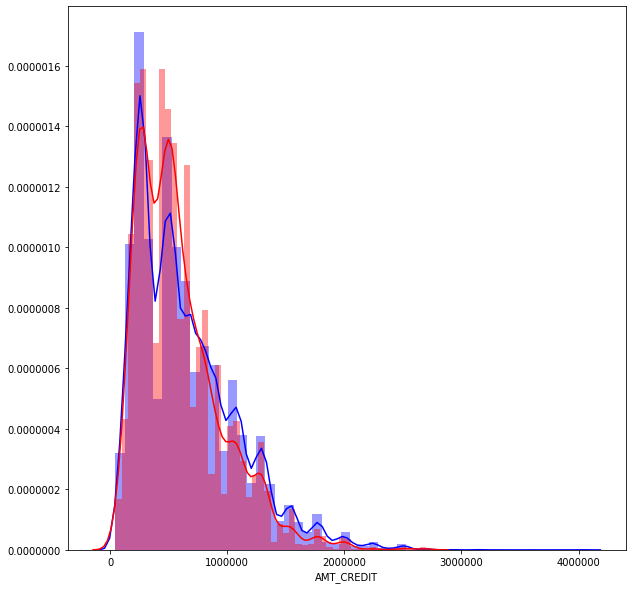

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
# plt.xlim(0,4000000)
sns.distplot(new_df["AMT_CREDIT"][new_df["TARGET"]==0], bins=50, color="b")
sns.distplot(new_df["AMT_CREDIT"][new_df["TARGET"]==1], bins=50, color="r")
plt.show()

全体的な傾向は期日内の返済の有無で変わらない。

### (AMT_ANNUITY:ローン年金)

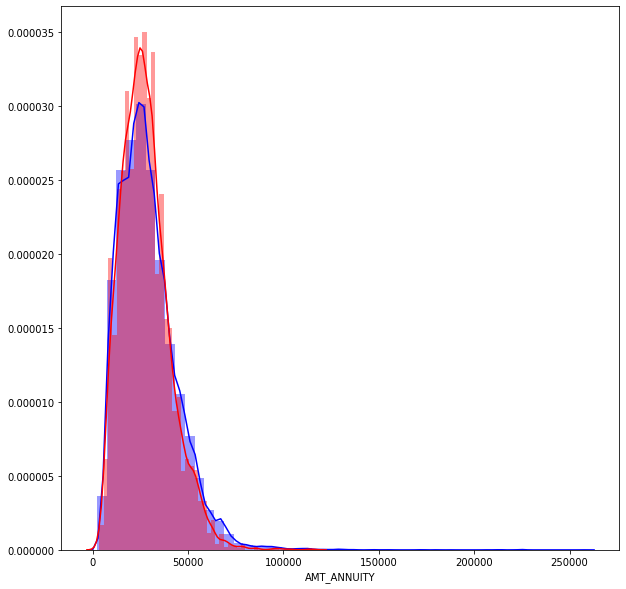

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))
# plt.xlim(0,4000000)
sns.distplot(new_df["AMT_ANNUITY"][new_df["TARGET"]==0], bins=50, color="b")
sns.distplot(new_df["AMT_ANNUITY"][new_df["TARGET"]==1], bins=50, color="r")
plt.show()

期日内の返済の有無に関わらず、ほぼ同様の傾向を示す。

### (AMT_GOODS_PRICE:消費者ローンの場合、融資対象となる商品の価格)

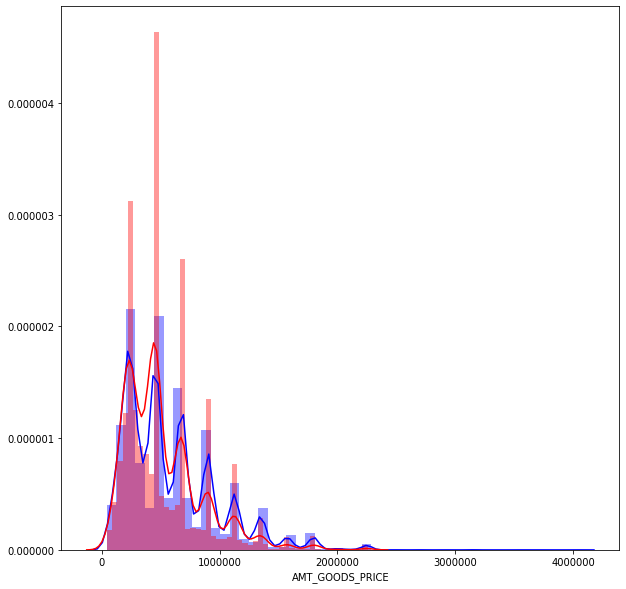

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
# plt.xlim(0,4000000)
sns.distplot(new_df["AMT_GOODS_PRICE"][new_df["TARGET"]==0], bins=50, color="b")
sns.distplot(new_df["AMT_GOODS_PRICE"][new_df["TARGET"]==1], bins=50, color="r")
plt.show()

期日内に返済出来なかった人は1000000ドル以下のローンを組んでいる割合が大きいが、全体的な傾向は、さほど変わらない。

### (AMT_GOODS_PRICE:消費者ローンの場合、融資対象となる商品の価格)

In [33]:
pd.set_option('display.max_rows', None)
print(new_df.columns.value_counts)

<bound method IndexOpsMixin.value_counts of Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes', 'AGE',
       'REGIST_YEAR'],
      dtype='object', length=191)>


### AMT系の相関係数を算出する

In [78]:
new_df_corr = new_df[["AMT_INCOME_TOTAL", "AMT_ANNUITY","AMT_CREDIT", "AMT_GOODS_PRICE"]].corr()
new_df_corr

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.113900,0.092634,0.094058
AMT_ANNUITY,0.113900,1.000000,0.759013,0.764352
AMT_CREDIT,0.092634,0.759013,1.000000,0.986841
AMT_GOODS_PRICE,0.094058,0.764352,0.986841,1.000000


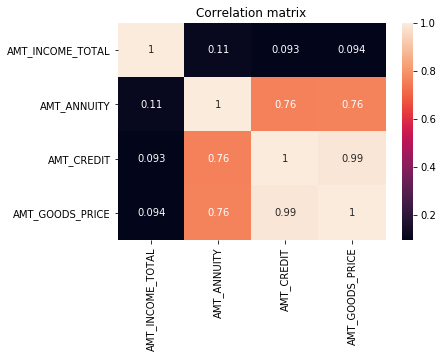

In [79]:
# ヒートマップの作成
import seaborn as sns
plt.title('Correlation matrix')
sns.heatmap(new_df_corr, vmax=1, annot=True)
plt.ylim(new_df_corr.shape[0], 0)
plt.show()

上記のヒートマップから、AMT_INCOME_TOTALとの相関は無いことがわかる。  
AMT_CREDITとAMT_ANNUITY,AMT_GOODS_PRICEとの関係を散布図で見てみる。  

### AMT_CREDITとAMT_ANNUITYの散布図を表示してみる

Text(0, 0.5, 'AMT_ANNUITY')

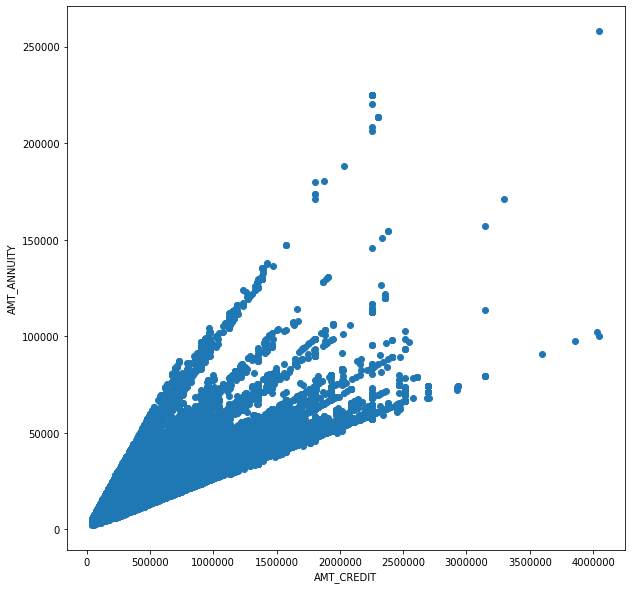

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(new_df["AMT_CREDIT"], new_df["AMT_ANNUITY"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')

上記の散布図からAMT_CREDITに対するAMT_ANNUITYが約５プラン用意されていることがわかる。

### AMT_CREDITとAMT_GOODS_PRICEの散布図を表示してみる

Text(0, 0.5, 'AMT_GOODS_PRICE')

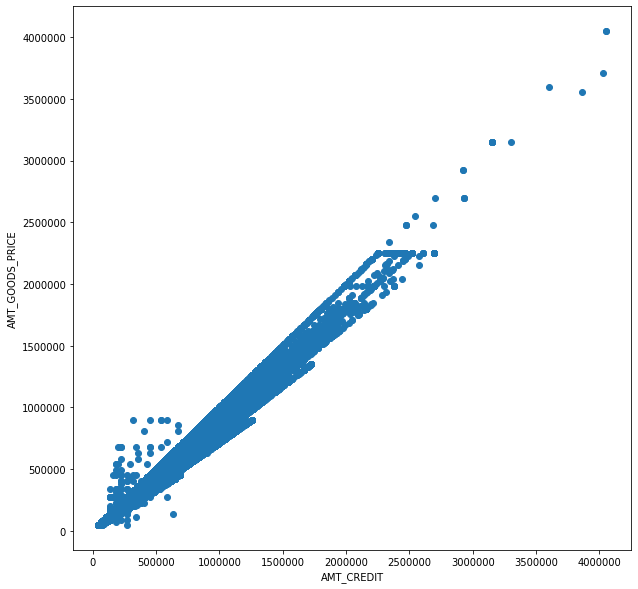

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(new_df["AMT_CREDIT"], new_df["AMT_GOODS_PRICE"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')

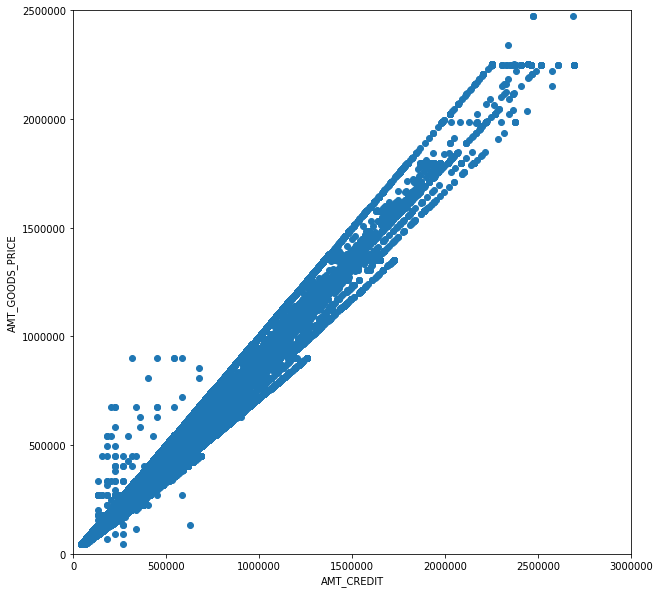

In [38]:
# 上記のグラフがプロットが密集しており、見にくい為、AMT_CREDITを3000000まで、AMT_GOODS_PRICEを2500000までで再プロットする
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(new_df["AMT_CREDIT"], new_df["AMT_GOODS_PRICE"])
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.xlim(0, 3000000)
plt.ylim(0, 2500000)
plt.show()

上記の散布図からAMT_CREDITをベースにAMT_GOODS_PRICEに関しても数プラン用意されているようだ。